In [1]:
import sys
import os
from datetime import datetime
import json
import shutil
import random
import ast
import numpy as np
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras
from tqdm import tqdm_notebook, tqdm
from matplotlib import pyplot as plt

In [8]:
path_to_folders = '../results/'

all = []
r_funcs = []
filenames = []

for i, filename in enumerate(os.listdir(path_to_folders)):
    if filename != '.DS_Store':
        filenames.append(filename)
        li = []

        data = json.load(open(os.path.join(path_to_folders, filename, 'DRL_trial', 'params.json')))
        r_funcs.append(data['reward_function'])

        path_to_files = os.path.join(path_to_folders, filename, 'DRL_trial', 'episodes')
        files = os.listdir(path_to_files)
        for file in files:
            df = pd.read_csv(os.path.join(path_to_files, file), index_col=None, header=0)
            li.append(df)

        frame = pd.concat(li, axis=0, ignore_index=True)
        all.append(frame)

#dfep = pd.read_csv(f'/Users/samuelharck/Desktop/Projekt/ai_trader/data/20230328_180031/DRL_trial_0/Epi_1_run_1.csv')

In [10]:
print(filenames)
print(r_funcs)

['20230406_073724', '20230407_074818', '20230408_063941', '20230404_093303']
['reward_differential_sharpe_ratio', 'reward_sharpe_ratio', 'reward_sortino_ratio', 'compute_reward_from_tutor']


In [3]:
all[0].keys()

Index(['Unnamed: 0', 'long_position', 'funding_rate', 'wallet_value',
       'episode', 'money', 'long_wallet', 'done', 'short_wallet',
       'buy_long_count', 'buy_short_count', 'swap_price', 'sell_long_count',
       'short_units', 'btc_price', 'state', 'sell_short_count', 'btc_units',
       'action', 'short_eur', 'fee_paid', 'btc_eur', 'short_position',
       'reward'],
      dtype='object')

In [4]:
r_funcs

['reward_differential_sharpe_ratio',
 'reward_sharpe_ratio',
 'reward_sortino_ratio',
 'compute_reward_from_tutor']

In [99]:
reward_distribution = []

for data in all:
    x = []
    d = data['reward'].values
    #print(d)
    if isinstance(d[0], str):
        y = [ast.literal_eval(x)[0] for x  in actions]
        x = y
    else:
        x = np.nan_to_num(d)
    reward_distribution.append(x)



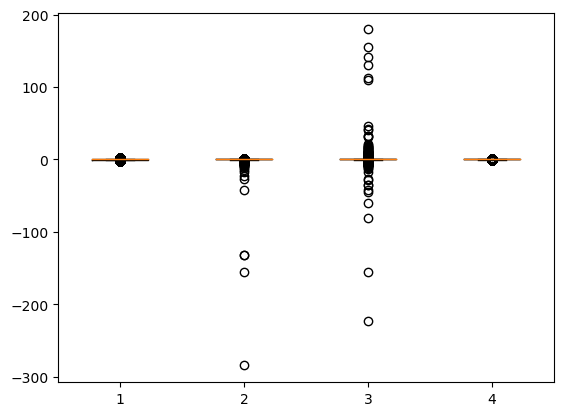

1: reward_differential_sharpe_ratio
2: reward_sharpe_ratio
3: reward_sortino_ratio
4: compute_reward_from_tutor


In [107]:
plt.boxplot(reward_distribution)
plt.show()
for i,r in enumerate(r_funcs):
    print(f'{i+1}: ' + r)

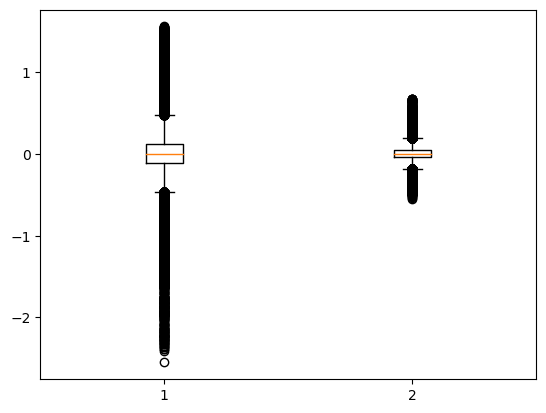

1: reward_differential_sharpe_ratio
2: compute_reward_from_tutor


In [108]:
plt.boxplot(reward_distribution[0::3])
plt.show()
print('1: ' + r_funcs[0])
print('2: ' + r_funcs[-1])

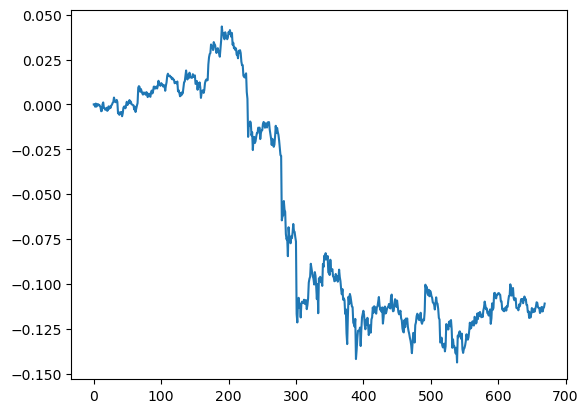

In [7]:
'''
One run of trader with DSR
Episode 2, Run 5
'''

df = pd.read_csv('../results/20230404_093303/DRL_trial/episodes/Epi_2_run_5_BTC.csv')

y = [ast.literal_eval(x)[0] for x  in df.reward]

plt.plot(y)


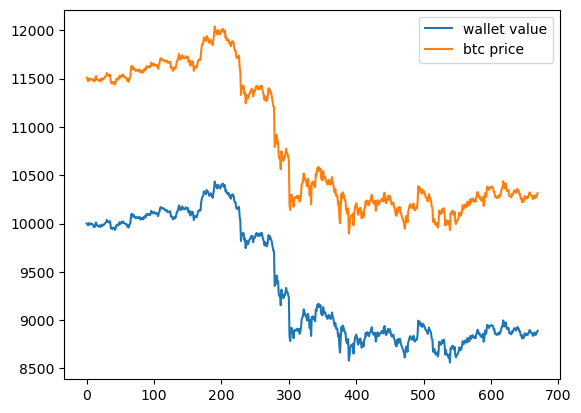

In [114]:
wallet = df['wallet_value'].values
btc = df['btc_price'].values

plt.plot(wallet, label='wallet value')
plt.plot(btc, label='btc price')
plt.legend()

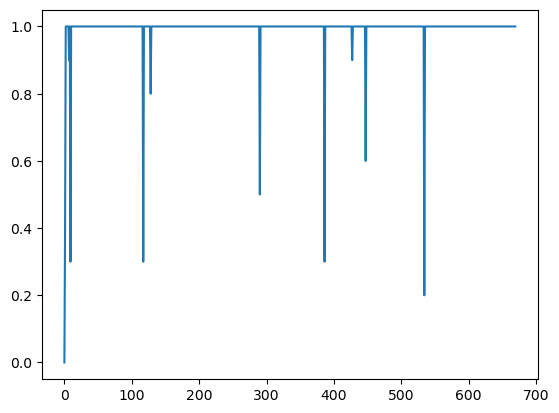

In [117]:
actions = df['action'].values
y = [ast.literal_eval(x)[0] for x  in actions]

plt.plot(y)
plt.title('Actions Episode: 2, Run: 5')

Text(0.5, 1.0, 'Actions Episode: 1, Run: 1')

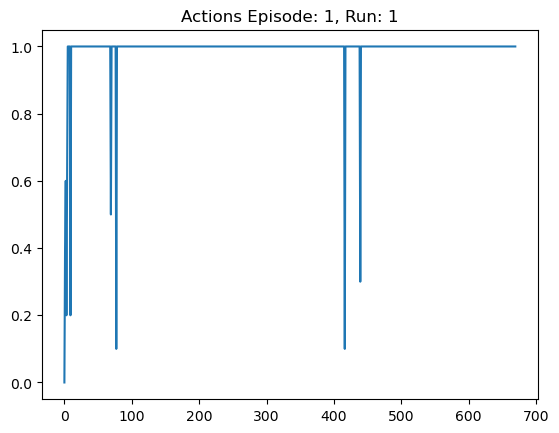

In [12]:
df = pd.read_csv('../results/20230404_093303/DRL_trial/episodes/Epi_1_run_1_BTC.csv')

actions = df['action'].values
y = [ast.literal_eval(x)[0] for x  in actions]

plt.plot(y)
plt.title('Actions Episode: 1, Run: 1')

In [17]:
#df.head(20)
df.loc[:,['action', 'wallet_value']].head(20)

,action,wallet_value
0,[0],10000.00
1,[0.4],9996.00
2,[0.6],10013.62
3,[0.2],9984.24
4,[0.6],9977.62
5,[1.],9987.37
6,[1.],9965.79
7,[1.],9969.67
8,[1.],9962.82
9,[0.2],9978.60


In [14]:
df.keys()

Index(['Unnamed: 0', 'short_position', 'sell_long_count', 'sell_short_count',
       'money', 'buy_long_count', 'buy_short_count', 'btc_units', 'fee_paid',
       'state', 'funding_rate', 'action', 'wallet_value', 'done', 'reward',
       'btc_price', 'short_eur', 'btc_eur', 'long_position', 'long_wallet',
       'episode', 'swap_price', 'short_units', 'short_wallet'],
      dtype='object')